In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.rc("xtick",labelsize = 15)
# plt.rc("ytick",labelsize = 15)

#import random
# for Animation 
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML , Image # for gif 
rc("animation" , html = "html5")

In [101]:
data = pd.read_csv('jla_mub_0.txt', delimiter =" " , header = None)   # use header = None ; else pandas read 1st row as a header and not as a data 
#print(type(data))
cov_data = pd.read_csv("jla_mub_covmatrix.txt", header = None)
data1 = data.to_numpy()
#print(type(data1))

#print(data1.shape)
cov_data1 = cov_data.to_numpy()
C = cov_data1.reshape(31,31)  # covariance matrix
#print(C.shape)

In [102]:
C_inv = np.linalg.inv(C)

In [103]:
# loading values into separate columns
z = data1[:,0] # redshift 
mu_data = data1[:,1] # mu values

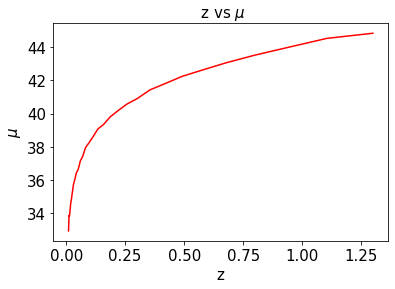

In [104]:
plt.title(" z vs $\mu$", fontsize =15)
plt.xlabel("z" , fontsize = 15)
plt.ylabel("$\mu$" , fontsize = 15)
plt.plot(z,mu_data , color ="red")
#plt.savefig("plot 1s .pdf")

In [105]:
def eta(a, omg):
  s = ((1 - omg) / omg )**(1/3)
  c = 2 * (((s**3) + 1)**(0.5))
  h = ((1/a**4) - (0.1540 * (s/(a**3))) + (0.4304 * ((s/a)**2)) + (0.19097 * ((s**3)/a)) + (0.066941 *(s**4)))
  return c * (h**(- 1/8))

In [106]:
def D_l(h, z , omega_m): # D_l* (D_l where h = 1)
  c = 3 * (10**5)
  #h = 1 
  Ho = 100 
  r = eta(1, omega_m) - eta((1/(1+z)), omega_m)
  return (c/Ho) * (1+z) * r

In [107]:
def mu(h,z,omega_m):
  return 25  + (5 * np.log10(D_l(h,z,omega_m))) - (5 * np.log10(h))

In [108]:
def likelihood (h,z,omega_m):
  #u = 0
  u = 0
  mu_theory = mu(h,z,omega_m)
  if h<0 or h>1 or omega_m < 0.2 or omega_m >1 : return -np.inf
  else:
    for i in range(31):
      for j in range(31):
        u += (mu_data[i] - mu_theory[i]) * C_inv[i,j] * (mu_data[j] - mu_theory[j])
    # v = mu_data - mu_theory
  # k = np.dot(v,C_inv)
  # q = np.dot (k,v)
  # #s = np.sum(q)
  return ((-0.5) * u) 

In [109]:
def MCMC(sig,n):   # sigma , no. of iterations
  # h0 = 0.6  # initial
  # omg0 = 0.4  # initial 
  h0 = np.random.uniform(0,1)  #  randomly initializing
  omg0 = np.random.uniform(0,1) #   randomly initializing

  #mu_accepted = []
  #mu_accepted = mu(h0,z,omg0)

  h_hist = np.zeros(n)
  omg_hist = np.zeros(n)
  acpt_no = 0
  h_hist[0] = h0
  omg_hist[0] = omg0
  
  for i in range (1,n):
    
    h = np.random.normal(h0,sig)
    omg = np.random.normal(omg0,sig)
    f = np.exp((likelihood(h,z,omg) - likelihood(h0,z,omg0)))
    
    f1 = min((f,1))

    g = np.random.uniform(0,1)
    
    if g < f1:
      h0 = h
      omg0 = omg
      acpt_no+=1
    else : 
      h0 = h0
      omg0 = omg0


    h_hist[i] = h0
    omg_hist[i] = omg0
    #mu0 = mu(h0,z,omg0) 
    #print(mu0)
  
    #mu_accepted[i,0] = mu0
  # x_s = [h0 , omg0]
  # mu0 = mu(x_s[0],z, x_s[-1])
  #mu_accepted.append(mu0)

  return h_hist , omg_hist , acpt_no #, mu_accepted  

In [110]:
# for i in range (1,31):
#   print (i)
#type(mu0)

In [111]:
mu_data

array([32.95388698, 33.87900347, 33.84214074, 34.11856704, 34.59344598,
       34.93902653, 35.25209633, 35.74850165, 36.06978761, 36.43457047,
       36.65111059, 37.15801411, 37.43017325, 37.95661635, 38.25325404,
       38.61286934, 39.06785071, 39.3414019 , 39.79214362, 40.1565346 ,
       40.56495606, 40.90528778, 41.42141744, 41.79092346, 42.23146107,
       42.61704707, 43.05273149, 43.50415083, 43.97257341, 44.51408758,
       44.82186746])

In [112]:
#len(mu_accepted[0])

In [113]:
h_hist , omg_hist ,a = MCMC(0.05,1000)
#omg_hist = MCMC(0.05)[1]

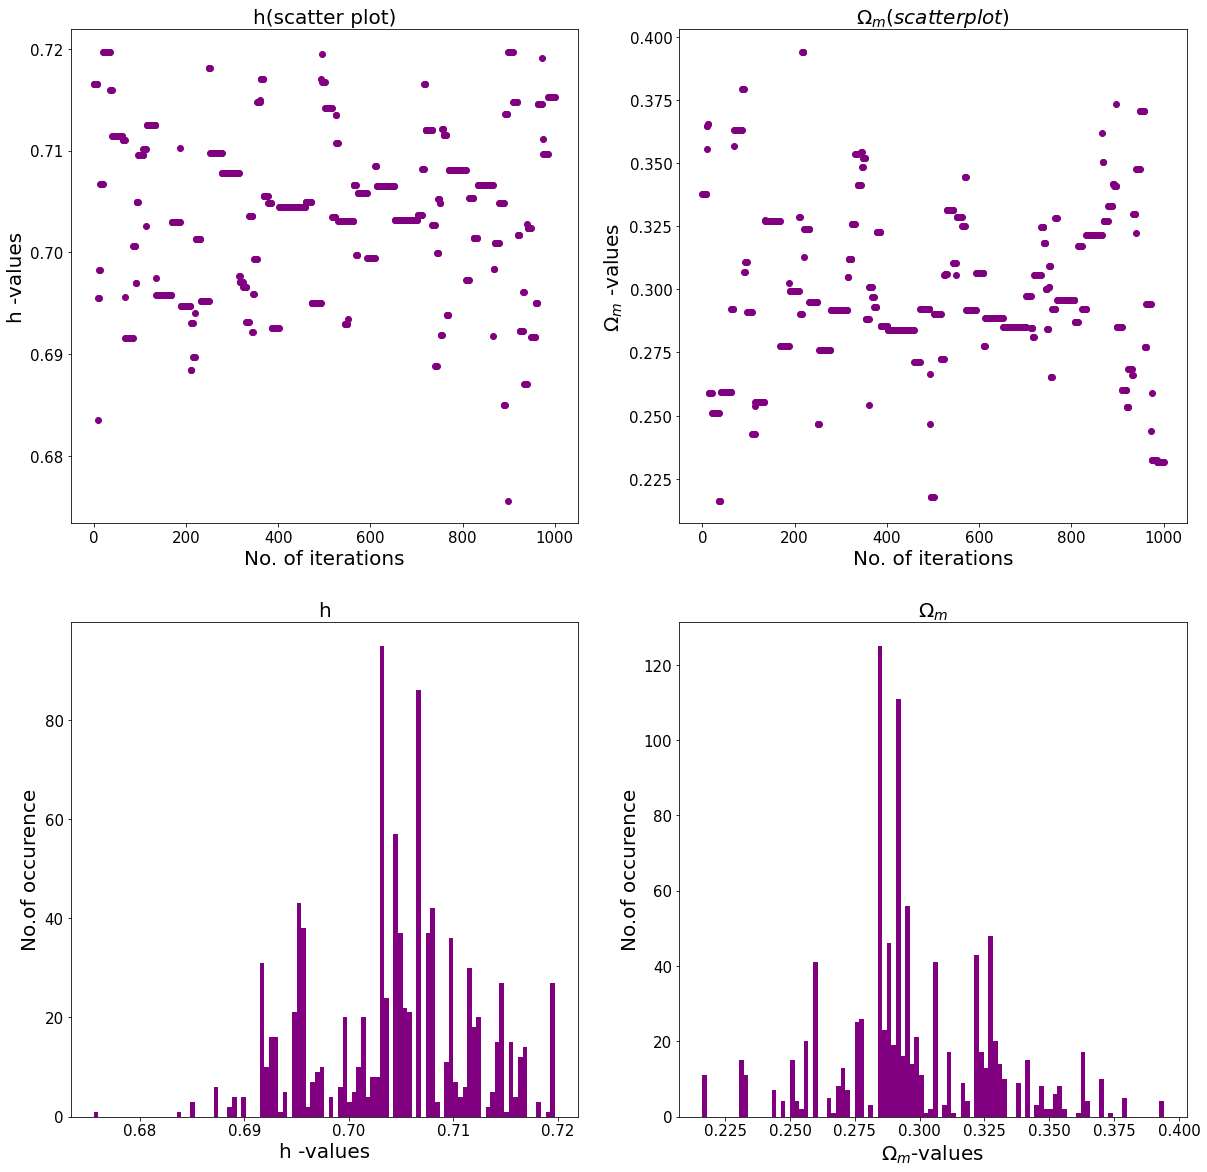

In [148]:
i = np.linspace(0,1000,1000)

plt.figure (figsize = (20,20))
plt.subplot(2,2,1)
plt.xlabel("No. of iterations" , fontsize = 20)
plt.ylabel("h -values",fontsize = 20)
plt.scatter(i,h_hist, color ="purple" )

plt.title('h(scatter plot)',fontsize= 20)

plt.subplot(2,2,2)
plt.xlabel("No. of iterations",fontsize = 20)
plt.ylabel("$\Omega_m$ -values",fontsize = 20)
plt.scatter(i,omg_hist , color ="purple")

plt.title('$\Omega_m(scatter plot) $',fontsize= 20)





plt.subplot(2,2,3)
plt.ylabel("No.of occurence",fontsize = 20)
plt.xlabel("h -values",fontsize = 20)
plt.hist(h_hist,color ="purple" , bins = 100)

plt.title('h',fontsize = 20)

plt.subplot(2,2,4)
plt.ylabel("No.of occurence",fontsize = 20)
plt.xlabel("$\Omega_m$-values",fontsize = 20)

plt.hist(omg_hist , color ="purple" , bins =100)

plt.title('$\Omega_m $',fontsize = 20)

plt.savefig("o.pdf")

sample mean(h): 0.7044080544756939
sample mean($\Omega_m$): 0.2971695235551424
sample variance(h): 5.5121805790922976e-05
sample variance($\Omega_m$): 0.0009402657057797608
covariance between h and omega: [[ 5.51769828e-05 -1.24624479e-04]
 [-1.24624479e-04  9.41206913e-04]]


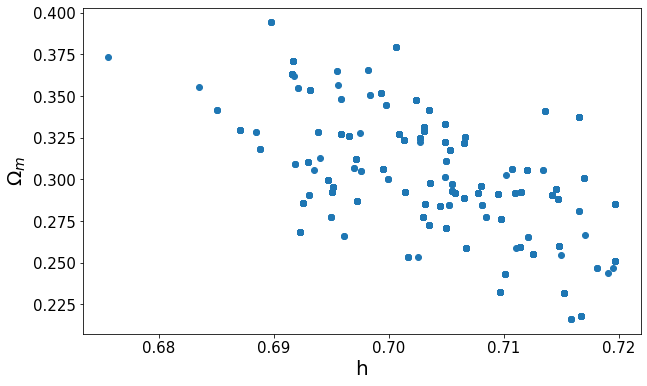

In [115]:
plt.figure(figsize=(10,6))
plt.xlabel("h",fontsize = 20)
plt.ylabel("$\Omega_m$" ,fontsize = 20)
plt.scatter(h_hist,omg_hist)
meanh = np.mean(h_hist)
meano = np.mean(omg_hist)
covh = np.cov(h_hist)
covo = np.cov(omg_hist)
cov = np.cov(h_hist,omg_hist)
stdh = np.std(h_hist)
stdo = np.std(omg_hist)
print("sample mean(h):",meanh)
print("sample mean($\Omega_m$):",meano)
print("sample variance(h):",stdh**2)
print("sample variance($\Omega_m$):",stdo**2)
print("covariance between h and omega:",cov)
plt.savefig("p.pdf")

In [116]:
##                        FOR ANIMATION 

# fig = plt.figure()

# n = 10000
# def animate(g):
#   u = n*g
#   plt.clf()
#   plt.plot(omg_hist[:],h_hist[:],"red")
#   #plt.plot(x,ga_ss1[u,:],"blue")
  
  

# anime = FuncAnimation(fig,animate,frames = n ,interval = 20)
# HTML(anime.to_html5_video()) 

In [117]:
# mu_plot = np.array(MCMC(0.5)[2])
# mu_plot1 = mu_plot.reshape(31,)

In [118]:
# plt.figure(figsize =(10,5))
# plt.title(" z vs $\mu$",fontsize = 20)
# plt.xlabel("z",fontsize = 20)
# plt.ylabel("$\mu$",fontsize = 20)
# plt.plot(z,mu_data , color ="red", label = "evidence",ls = "-")
# plt.plot(z,mu_plot1, color ="cyan", label = "sampling",ls ="-.")
# plt.legend(fontsize = 15)
# plt.savefig("plot1.pdf")

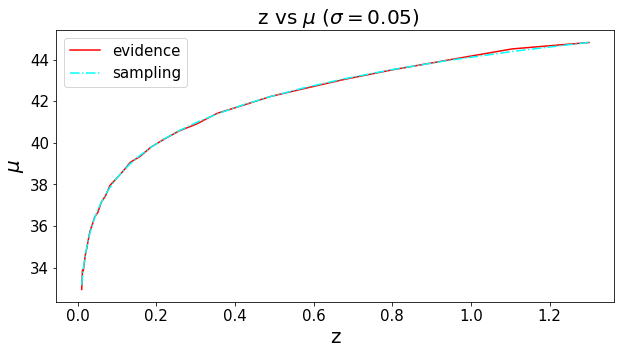

In [149]:
mu_plot = mu(0.703,z,0.28)
mu_plot1 = mu_plot.reshape(31,)

plt.figure(figsize =(10,5))
plt.title(" z vs $\mu$ ($\sigma = 0.05$)",fontsize = 20)
plt.xlabel("z",fontsize = 20)
plt.ylabel("$\mu$",fontsize = 20)
plt.plot(z,mu_data , color ="red", label = "evidence",ls = "-")
plt.plot(z,mu_plot1, color ="cyan", label = "sampling",ls ="-.")
plt.legend(fontsize = 15)
plt.savefig("plot1.pdf")

In [120]:
# for small distribution size 
h1 , omg1 , a1 = MCMC(0.001,1000)
#omg1 = MCMC(0.001)[1]
#mu_plot2s = np.array(MCMC(0.001)[2])



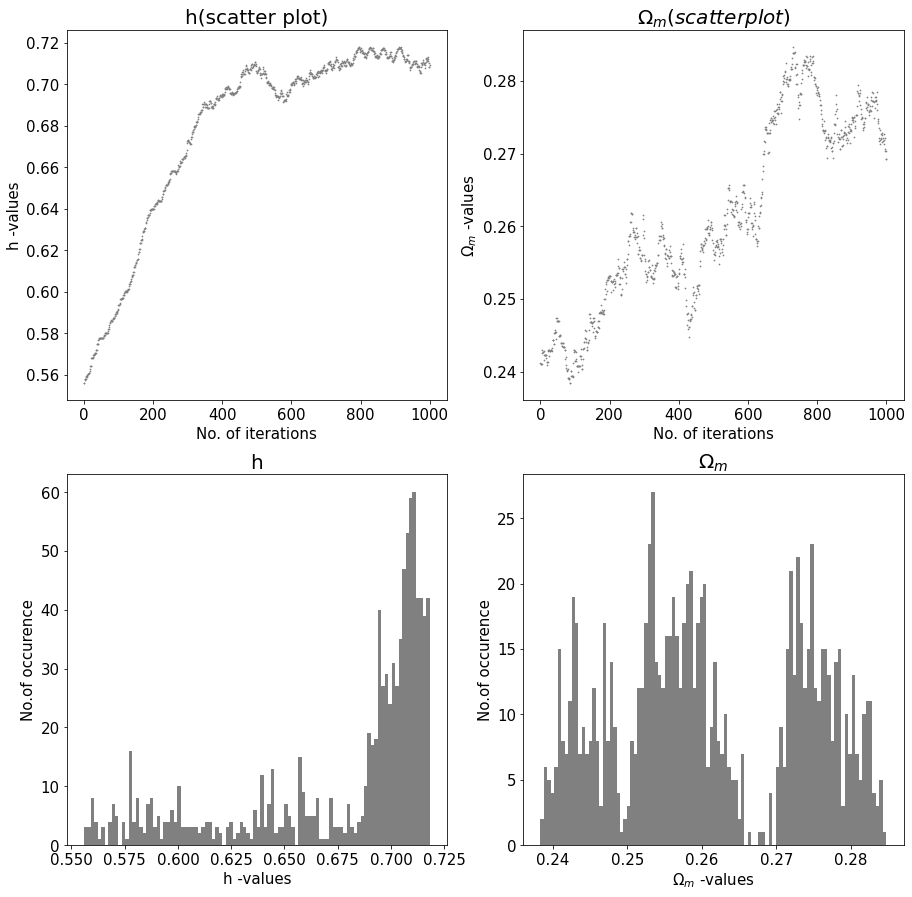

In [150]:
plt.figure (figsize = (15,15))
plt.subplot(2,2,1)
plt.xlabel("No. of iterations" , fontsize = 15)
plt.ylabel("h -values",fontsize = 15)
plt.scatter(i,h1, color ="grey" , s = 0.5)

plt.title('h(scatter plot)',fontsize= 20)

plt.subplot(2,2,2)
plt.xlabel("No. of iterations",fontsize = 15)
plt.ylabel("$\Omega_m$ -values",fontsize = 15)
plt.scatter(i,omg1 , color ="grey" , s = 0.5)

plt.title('$\Omega_m(scatter plot) $',fontsize= 20)





plt.subplot(2,2,3)
plt.ylabel("No.of occurence",fontsize = 15)
plt.xlabel("h -values",fontsize = 15)
plt.hist(h1,color ="grey" , bins = 100)

plt.title('h',fontsize = 20)

plt.subplot(2,2,4)
plt.ylabel("No.of occurence",fontsize = 15)
plt.xlabel("$\Omega_m$ -values",fontsize = 15)

plt.hist(omg1 , color ="grey" , bins =100)

plt.title('$\Omega_m $',fontsize = 20)

plt.savefig("o1.pdf")

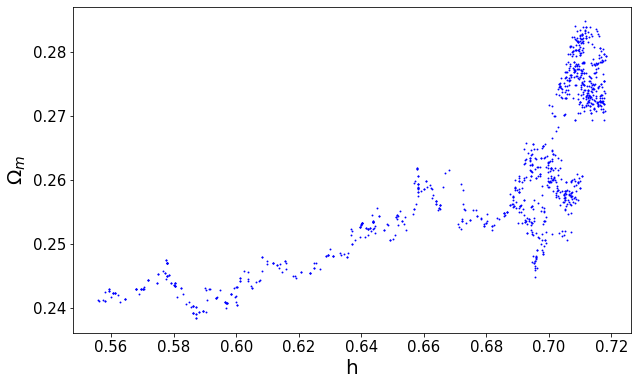

In [122]:
plt.figure(figsize=(10,6))
plt.xlabel("h",fontsize = 20)
plt.ylabel("$\Omega_m$" ,fontsize = 20)
plt.scatter(h1,omg1,s= 0.8 ,color ="blue")
plt.savefig("s1.pdf")

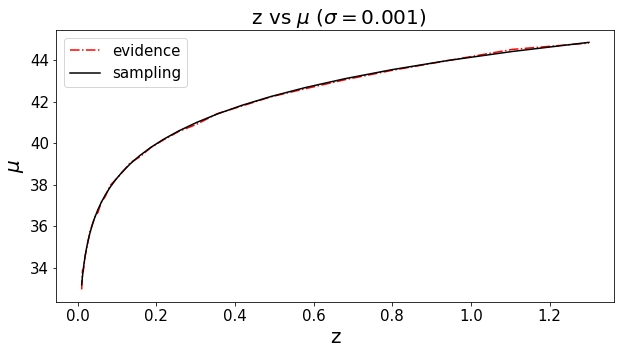

In [151]:
mu_plot2s = mu(0.7,z,0.27)
mu_plot2 = mu_plot2s.reshape(31,)

plt.figure(figsize =(10,5))
plt.title(" z vs $\mu$ ($\sigma = 0.001$)",fontsize = 20)
plt.xlabel("z",fontsize = 20)
plt.ylabel("$\mu$",fontsize = 20)
plt.plot(z,mu_data , color ="red", label = "evidence",ls = "-.")
plt.plot(z,mu_plot2, color ="black", label = "sampling")
plt.legend(fontsize = 15)
plt.savefig("2.pdf")


In [124]:
# for large distribution size 
h2,omg2,a2 = MCMC(1,1000)
#mu_plot3l = np.array(MCMC(100)[2])


<ipython-input-109-862d09199aa3>:20: RuntimeWarning: overflow encountered in exp
  f = np.exp((likelihood(h,z,omg) - likelihood(h0,z,omg0)))
<ipython-input-107-c7ecd78e8ea5>:2: RuntimeWarning: invalid value encountered in log10
  return 25  + (5 * np.log10(D_l(h,z,omega_m))) - (5 * np.log10(h))


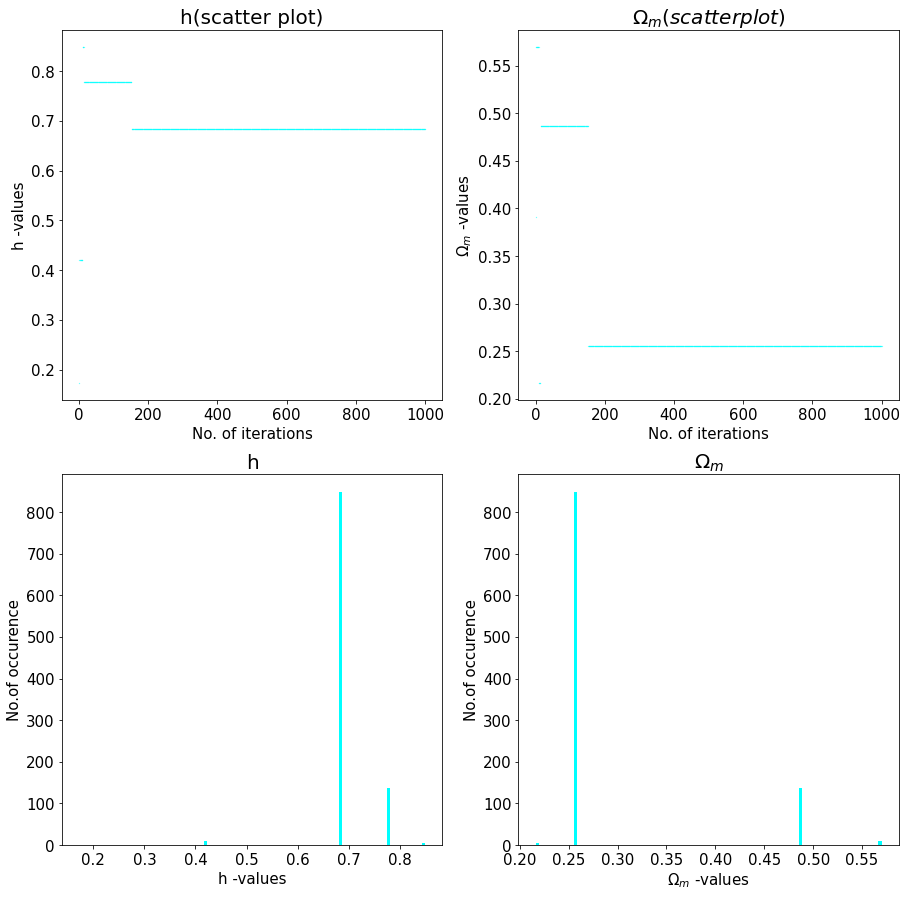

In [152]:
plt.figure (figsize = (15,15))
plt.subplot(2,2,1)
plt.xlabel("No. of iterations" , fontsize = 15)
plt.ylabel("h -values",fontsize = 15)
plt.scatter(i,h2, color ="cyan" , s = 0.05)

plt.title('h(scatter plot)',fontsize= 20)

plt.subplot(2,2,2)
plt.xlabel("No. of iterations",fontsize = 15)
plt.ylabel("$\Omega_m$ -values",fontsize = 15)
plt.scatter(i,omg2 , color ="cyan" , s = 0.05)

plt.title('$\Omega_m(scatter plot) $',fontsize= 20)





plt.subplot(2,2,3)
plt.ylabel("No.of occurence",fontsize = 15)
plt.xlabel("h -values",fontsize = 15)
plt.hist(h2,color ="cyan" , bins = 100)

plt.title('h',fontsize = 20)

plt.subplot(2,2,4)
plt.ylabel("No.of occurence",fontsize = 15)
plt.xlabel("$\Omega_m$ -values",fontsize = 15)

plt.hist(omg2 , color ="cyan" , bins =100)

plt.title('$\Omega_m $',fontsize = 20)

plt.savefig("plots1a.pdf")

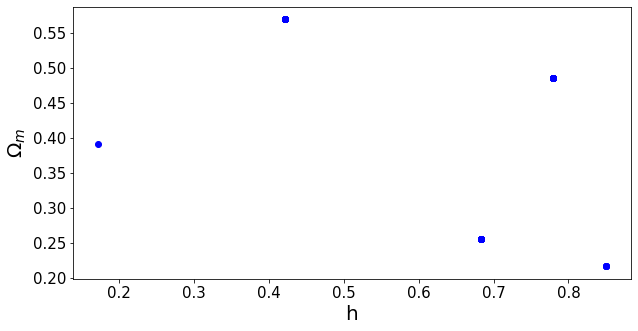

In [156]:
plt.figure(figsize=(10,5))
plt.xlabel("h",fontsize = 20)
plt.ylabel("$\Omega_m$" ,fontsize = 20)
plt.scatter(h2,omg2,color ="blue")
plt.savefig("scatter2.pdf")

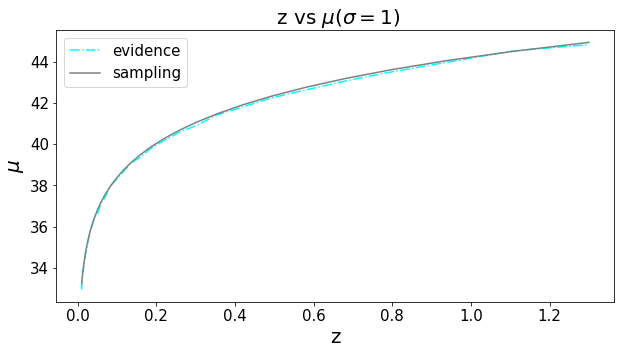

In [155]:
mu_plot3l = mu(0.68,z,0.26)
mu_plot3 = mu_plot3l.reshape(31,)
plt.figure(figsize =(10,5))
plt.title(" z vs $\mu$($\sigma = 1$)",fontsize = 20)
plt.xlabel("z",fontsize = 20)
plt.ylabel("$\mu$",fontsize = 20)
plt.plot(z,mu_data , color ="cyan", label = "evidence",ls = "-.")
plt.plot(z,mu_plot3, color ="grey", label = "sampling")
plt.legend(fontsize = 15)
plt.savefig("3.pdf")

In [128]:
h3 , omg3,a3 = MCMC(100,1000)

<ipython-input-107-c7ecd78e8ea5>:2: RuntimeWarning: invalid value encountered in log10
  return 25  + (5 * np.log10(D_l(h,z,omega_m))) - (5 * np.log10(h))


Text(0.5, 1.0, '$\\Omega_m $')

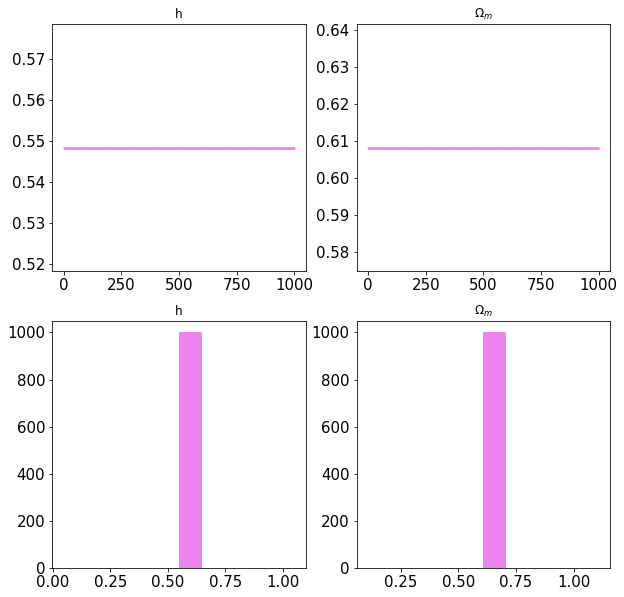

In [129]:
plt.figure (figsize = (10,10))
plt.subplot(2,2,1)

plt.scatter(i,h3, color ="violet" , s= 0.5)

plt.title('h')

plt.subplot(2,2,2)

plt.scatter(i,omg3 , color ="violet" , s=0.5)

plt.title('$\Omega_m $')





plt.subplot(2,2,3)

plt.hist(h3,color ="violet")
plt.title('h')

plt.subplot(2,2,4)

plt.hist(omg3 , color ="violet")

plt.title('$\Omega_m $')

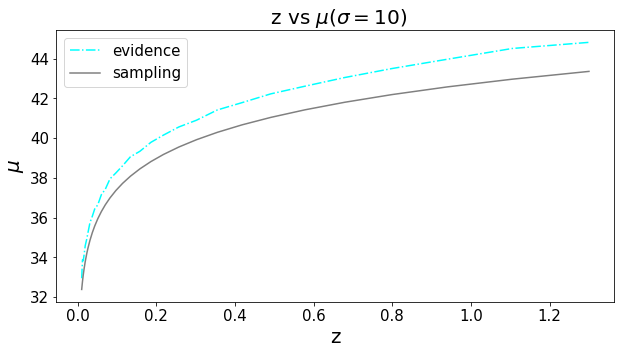

In [130]:
mu_plot3l = mu(1,z,1)
mu_plot3 = mu_plot3l.reshape(31,)
plt.figure(figsize =(10,5))
plt.title(" z vs $\mu$($\sigma = 10$)",fontsize = 20)
plt.xlabel("z",fontsize = 20)
plt.ylabel("$\mu$",fontsize = 20)
plt.plot(z,mu_data , color ="cyan", label = "evidence",ls = "-.")
plt.plot(z,mu_plot3, color ="grey", label = "sampling")
plt.legend(fontsize = 15)

In [140]:
k = np.geomspace(0.001,5,50)
acpt_ratio = []
for j in range(len(k)): 
  a = MCMC(k[j],1000)[2]
  acpt_ratio.append(a/1000)

acpt_ratio_plot = np.asarray(acpt_ratio)
print(acpt_ratio_plot)

<ipython-input-109-862d09199aa3>:20: RuntimeWarning: overflow encountered in exp
  f = np.exp((likelihood(h,z,omg) - likelihood(h0,z,omg0)))
<ipython-input-107-c7ecd78e8ea5>:2: RuntimeWarning: invalid value encountered in log10
  return 25  + (5 * np.log10(D_l(h,z,omega_m))) - (5 * np.log10(h))


[0.629 0.507 0.818 0.    0.842 0.662 0.687 0.75  0.669 0.726 0.629 0.622
 0.581 0.499 0.428 0.412 0.365 0.319 0.271 0.229 0.182 0.153 0.122 0.086
 0.077 0.066 0.033 0.052 0.029 0.021 0.012 0.011 0.015 0.015 0.006 0.008
 0.004 0.008 0.007 0.009 0.008 0.004 0.008 0.007 0.003 0.003 0.001 0.004
 0.001 0.002]


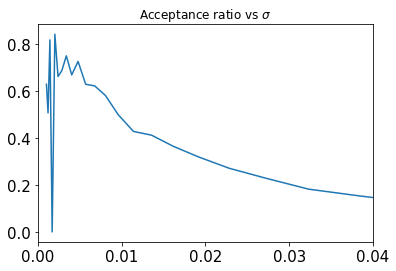

In [141]:
plt.xlim(0,0.04)
plt.title("Acceptance ratio vs $\sigma$")
plt.plot(k,acpt_ratio_plot)
plt.savefig("acpt.pdf")

In [161]:
# reasonable proposal distribution 

h_reas , omg_reas , a_reas = MCMC(0.01,10000)
meanh = np.mean(h_reas)
meano = np.mean(omg_reas)
covh = np.cov(h_reas)
covo = np.cov(omg_reas)
cov = np.cov(h_reas,omg_reas)
stdh = np.std(h_reas)
stdo = np.std(omg_reas)
print("sample mean(h):",meanh)
print("sample mean($\Omega_m$):",meano)
print("sample variance(h):",stdh**2)
print("sample variance($\Omega_m$):",stdo**2)
print("covariance between h and omega:",cov)

sample mean(h): 0.703016662149768
sample mean($\Omega_m$): 0.2954883986381187
sample variance(h): 5.7724906292772076e-05
sample variance($\Omega_m$): 0.0010402468258699502
covariance between h and omega: [[ 5.77306794e-05 -1.59753359e-04]
 [-1.59753359e-04  1.04035086e-03]]


In [162]:
i = np.linspace(0,10000,10000)

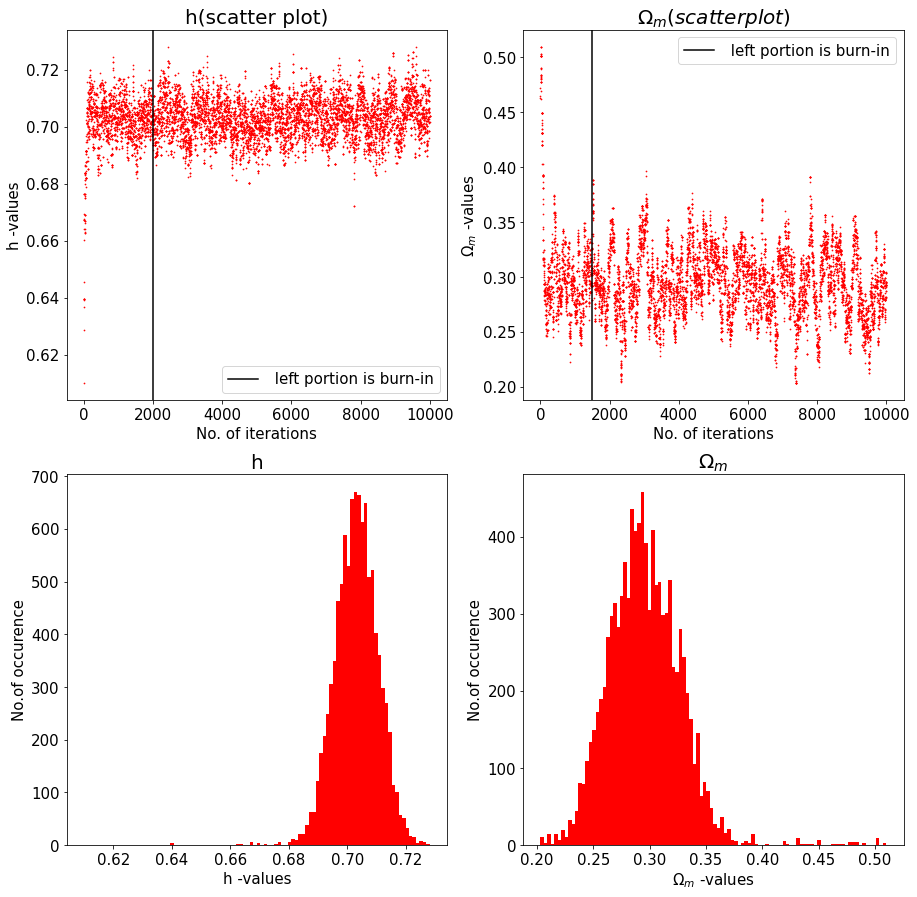

In [163]:
plt.figure (figsize = (15,15))
plt.subplot(2,2,1)
plt.xlabel("No. of iterations" , fontsize = 15)
plt.ylabel("h -values",fontsize = 15)
plt.scatter(i,h_reas, color ="r" , s = 0.5)
plt.axvline(x = 2000,color ='k',label =" left portion is burn-in")
plt.legend(fontsize =15)
plt.title('h(scatter plot)',fontsize= 20)

plt.subplot(2,2,2)
plt.xlabel("No. of iterations",fontsize = 15)
plt.ylabel("$\Omega_m$ -values",fontsize = 15)
plt.scatter(i,omg_reas , color ="r" , s = 0.5)
plt.axvline(x = 1500,color ='k',label =" left portion is burn-in")
plt.legend(fontsize = 15) 
plt.title('$\Omega_m(scatter plot) $',fontsize= 20)





plt.subplot(2,2,3)
plt.ylabel("No.of occurence",fontsize = 15)
plt.xlabel("h -values",fontsize = 15)
plt.hist(h_reas,color ="r" , bins = 100)

plt.title('h',fontsize = 20)

plt.subplot(2,2,4)
plt.ylabel("No.of occurence",fontsize = 15)
plt.xlabel("$\Omega_m$ -values",fontsize = 15)

plt.hist(omg_reas , color ="r" , bins =100)

plt.title('$\Omega_m $',fontsize = 20)

plt.savefig("plotsr.pdf")

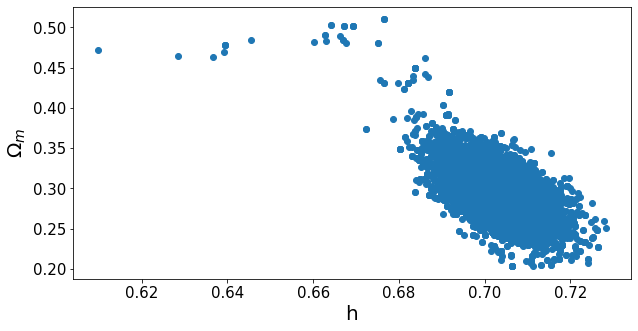

In [164]:

plt.figure(figsize=(10,5))
plt.xlabel("h",fontsize = 20)
plt.ylabel("$\Omega_m$" ,fontsize = 20)
#plt.scatter(h2,omg2,color ="blue")
#r2.pdf")
plt.scatter(h_reas,omg_reas)
plt.savefig("s3.pdf")

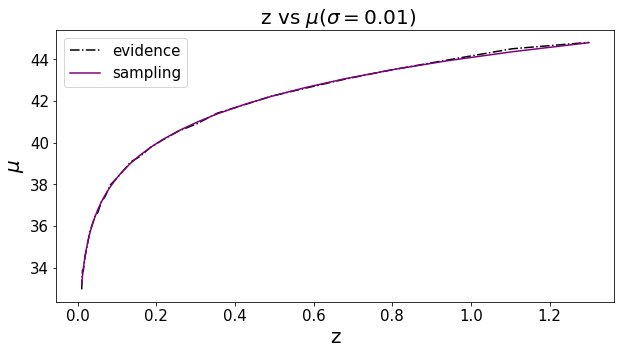

In [165]:
mu_plot_res = mu(0.7,z,0.3)
mu_plot3 = mu_plot_res.reshape(31,)
plt.figure(figsize =(10,5))
plt.title(" z vs $\mu$($\sigma =0.01$)",fontsize = 20)
plt.xlabel("z",fontsize = 20)
plt.ylabel("$\mu$",fontsize = 20)
plt.plot(z,mu_data , color ="black", label = "evidence",ls = "-.")
plt.plot(z,mu_plot3, color ="purple", label = "sampling")
plt.legend(fontsize = 15)
plt.savefig("r.pdf")